In [1]:
using QuadGK
using Polynomials

In [2]:
using Plots

In [3]:
(xp,a)=gauss(Float64,7)

([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

In [4]:
f(x) = x^2
sum(a .* f.(xp))

0.6666666666666669

Zadanie 1.

In [109]:
function legendre(n)
    if n == 0
        return Poly([1])
    elseif n == 1
        return Poly([0, 1])
    else
        return (2*n - 1)/n*Poly([0, 1])*legendre(n-1)-(n-1)/(n)*legendre(n-2)
    end
    
end

legendre (generic function with 1 method)

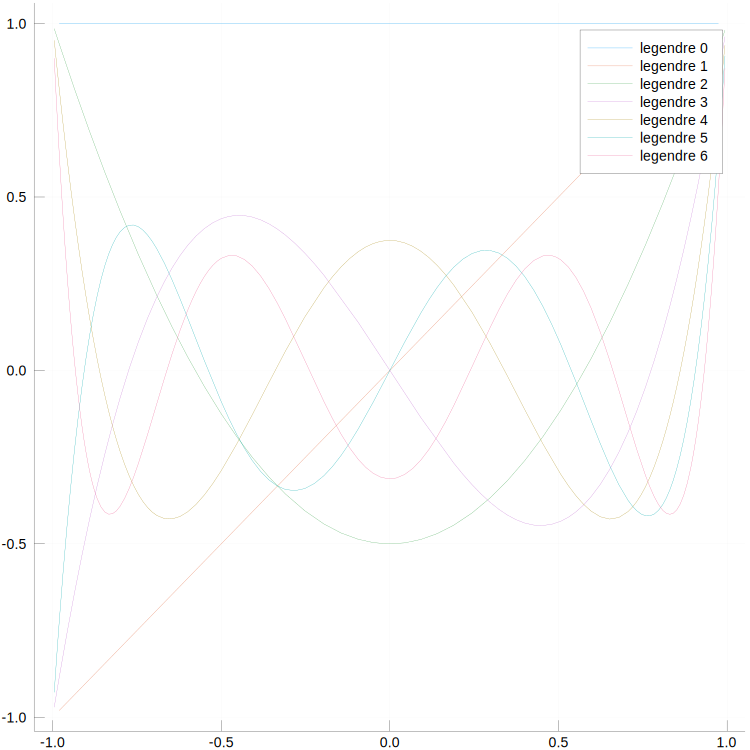

In [147]:
plot(x -> legendre(0)(x), -1, 1, size=(3000,3000), label = "legendre 0")
plot!(x -> legendre(1)(x), -1, 1, size=(3000,3000), label = "legendre 1")
plot!(x -> legendre(2)(x), -1, 1, size=(3000,3000), label = "legendre 2")
plot!(x -> legendre(3)(x), -1, 1, size=(3000,3000), label = "legendre 3")
plot!(x -> legendre(4)(x), -1, 1, size=(3000,3000), label = "legendre 4")
plot!(x -> legendre(5)(x), -1, 1, size=(3000,3000), label = "legendre 5")
plot!(x -> legendre(6)(x), -1, 1, size=(3000,3000), label = "legendre 6")


In [137]:
roots(legendre(2))

2-element Array{Float64,1}:
 -0.57735
  0.57735

In [111]:
gauss(2)

([-0.57735, 0.57735], [1.0, 1.0])

In [112]:
roots(legendre(3))

3-element Array{Float64,1}:
 -0.774597
  0.774597
  0.0     

In [113]:
gauss(3)

([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])

In [114]:
roots(legendre(4))

4-element Array{Float64,1}:
 -0.861136
  0.861136
 -0.339981
  0.339981

In [115]:
gauss(4)

([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

Podstawowe twierdzenie kwadratur Gaussa: Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x)
w [a, b] są zerami wielomianu ortogonalnego ϕn(x) dla tego samego przedziału i tej samej funkcji ważącej


Zadanie 2.
Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$ policzy $\int_{-1}^{1} f dx$ metodą używającą funkcji:
gauss(k)
oraz sumy 
sum(a .* f.(xp))

In [29]:
function gaussian_quadrature(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

gaussian_quadrature (generic function with 1 method)

In [46]:
f(x) = 5x^4 - 3x^3 + 6x^2 - 11
F(x) = x^5 - 3/4x^4 + 2x^3 - 11x

F (generic function with 1 method)

In [47]:
exact_F = F(1) - F(-1)

-16.0

In [48]:
for i in 1:100
    println(abs(exact_F - gaussian_quadrature(f, i)))
end

6.0
0.8888888888888822
7.105427357601002e-15
3.552713678800501e-15
5.329070518200751e-15
3.552713678800501e-15
3.552713678800501e-15
0.0
7.105427357601002e-15
0.0
3.552713678800501e-15
3.552713678800501e-15
3.552713678800501e-15
3.552713678800501e-15
1.7763568394002505e-15
0.0
1.7763568394002505e-15
3.552713678800501e-15
0.0
0.0
0.0
1.7763568394002505e-15
0.0
3.552713678800501e-15
1.7763568394002505e-15
3.552713678800501e-15
3.552713678800501e-15
1.7763568394002505e-15
3.552713678800501e-15
3.552713678800501e-15
3.552713678800501e-15
1.7763568394002505e-15
1.7763568394002505e-15
3.552713678800501e-15
0.0
0.0
0.0
0.0
3.552713678800501e-15
7.105427357601002e-15
0.0
0.0
0.0
1.7763568394002505e-15
3.552713678800501e-15
1.7763568394002505e-15
1.7763568394002505e-15
3.552713678800501e-15
0.0
3.552713678800501e-15
3.552713678800501e-15
3.552713678800501e-15
1.7763568394002505e-15
1.7763568394002505e-15
1.7763568394002505e-15
0.0
3.552713678800501e-15
1.7763568394002505e-15
0.0
7.1054273576010

Dla wielomianu stopnia 4 staje się dokładna od k = 3.

Twierdzenie o stopniu dokładności kwadratury Gaussa: 
Kwadratura ma stopień dokładności 2n-1.

Zadanie 3. Skorzystaj z rozwiązania zadania 2 do napisania funkcji liczącej całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$

dokonując normalizacji do $\int_{-1}^{1} F(z) dz$

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [103]:
function gaussian_quadrature2(f, k, a, b)
    f2(x) = f( (b+a)/2 + (b-a)/2 * x )
    (xp,c)=gauss(Float64,k)
    return (b-a)*sum(c .* f2.(xp))/2
end

gaussian_quadrature2 (generic function with 1 method)

In [106]:
print(gaussian_quadrature2(f, 10, -10, 10)) #zgadza się

203780.00000000006

Zadanie 4.
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja guadgk używająca całkowania Gauss-Kronroda.
Użyj tej funkcji do policzenia całki dla przykładowego wielomianu.
Funkcja ta ma możliwość liczenia również całek do nieskończoności Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa $ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [8]:
f(x) = 5x^4 - 3x^3 + 6x^2 - 11

f (generic function with 1 method)

In [9]:
quadgk(f, -10, 10)

(203779.99999999997, 0.0)

In [10]:
normal_dist(x) = 1/sqrt(2*pi)*e^(-x^2/2)

normal_dist (generic function with 1 method)

In [11]:
quadgk(normal_dist, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

Zadanie 5.
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie w zaleznosci od ilosci potrzebnych przedziałów dla przykładowego wielomianu.

Metoda trapezów

In [12]:
function trapezoidal_rule(f, n, xp, xk)
    #n -> liczba przedziałów
    dx = (xk - xp)/n
    sum = 0
    sum = f(xp)*dx/2
    
    for i in 1:(n-1)
        xi = xp + i/n*(xk-xp)
        sum = sum + dx * f(xi)
    end
    
    sum = sum + f(xk)*dx/2
    return sum
end  


trapezoidal_rule (generic function with 1 method)

In [13]:
f(x) = 5x^4 - 3x^3 + 6x^2 - 11
F(x) = x^5 - 3/4x^4 + 2x^3 - 11x

F (generic function with 1 method)

Całkujemy na przedziale (-10, 10)

In [14]:
exact = F(10) - F(-10)

203780.0

In [15]:
trapezoidal_rule(f, 100, -10, 10)

203914.128

In [16]:
error(f, n) = abs(exact - trapezoidal_rule(f, n, -10, 10))

error (generic function with 1 method)

In [17]:
x = range(10, 1000)
y = error.(f,x)

1000-element Array{Float64,1}:
 13360.0    
 11049.0    
  9289.09   
  7918.21   
  6829.65   
  5950.95   
  5231.45   
  4634.91   
  4134.84   
  3711.51   
  3350.0    
  3038.83   
  2769.07   
     ⋮      
     1.34671
     1.34402
     1.34133
     1.33865
     1.33598
     1.33332
     1.33067
     1.32802
     1.32538
     1.32275
     1.32013
     1.31751

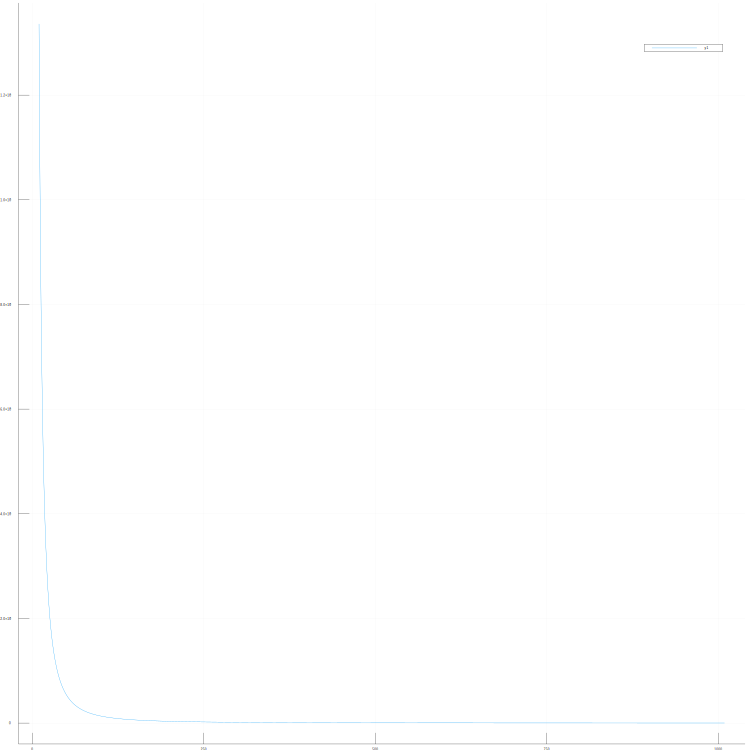

In [18]:
plot(x, y, size=(3000,3000))